SIGNATURE VERIFICATION 

IMPORT THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from glob import glob



READING THE DATA PATH (SigComp Dataset)

In [2]:
IMAGE_SIZE = [224, 224]

train_path = "/content/drive/MyDrive/sign_data_mod_mod/train"
test_path  = "/content/drive/MyDrive/sign_data_mod_mod/test"

DATA AUGMENTATION

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

TRAINING DATASET

In [4]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1649 images belonging to 2 classes.


TESTING DATASET

In [5]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 500 images belonging to 2 classes.


In [6]:
training_set.class_indices

{'FORGED': 0, 'GENUINE': 1}

In [7]:
test_set.class_indices


{'FORGED': 0, 'GENUINE': 1}

DATA AUGMENTED IMAGES




In [8]:
def Show_Image(img_arr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()

  for img,ax in zip(img_arr,axes):
    ax.imshow(img)
  
  plt.tight_layout()
  plt.show()

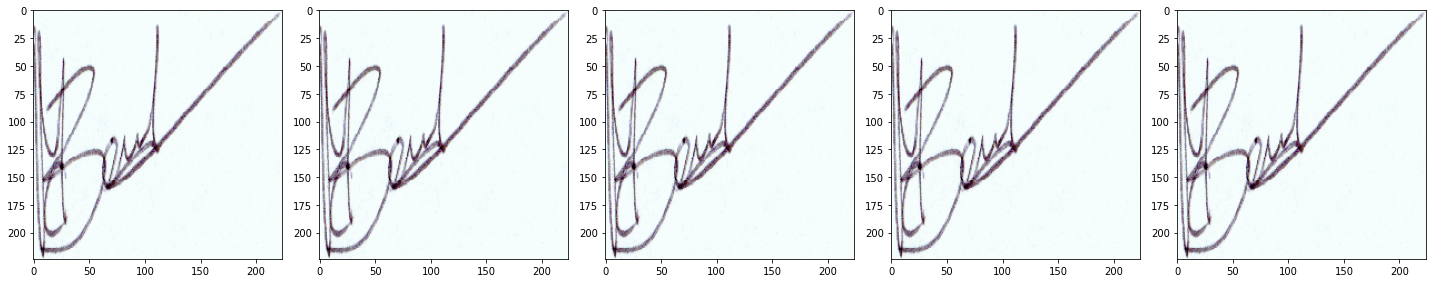

In [9]:
images=[training_set[0][0][0] for i in range(6)]
Show_Image(images)

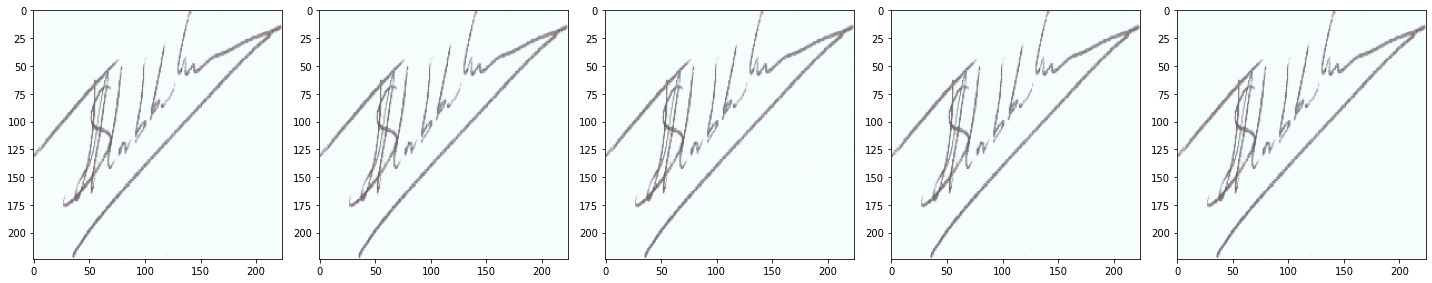

In [10]:
images=[test_set[0][0][0] for i in range(6)]
Show_Image(images)

MOBILENETV2 MODEL FOR TRAINING

In [11]:
model_mobilenet=MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
for layer in model_mobilenet.layers:
    layer.trainable = False

In [13]:
folders = glob('/content/drive/MyDrive/sign_data_mod_mod/train/*')

In [14]:
folders

['/content/drive/MyDrive/sign_data_mod_mod/train/FORGED',
 '/content/drive/MyDrive/sign_data_mod_mod/train/GENUINE']

In [15]:
x = Flatten()(model_mobilenet.output)

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)


In [17]:
model = Model(model_mobilenet.input, outputs=prediction)

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [19]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=[tensorflow.keras.metrics.AUC(),"accuracy"])


MODEL TRAINING

In [20]:
result = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
52/52 [==============================] - 646s 13s/step - loss: 2.6494 - auc: 0.7524 - accuracy: 0.7235 - val_loss: 0.2809 - val_auc: 0.9735 - val_accuracy: 0.9460
Epoch 2/50
52/52 [==============================] - 10s 187ms/step - loss: 0.1518 - auc: 0.9902 - accuracy: 0.9709 - val_loss: 0.0543 - val_auc: 0.9975 - val_accuracy: 0.9860
Epoch 3/50
52/52 [==============================] - 10s 184ms/step - loss: 0.0556 - auc: 0.9965 - accuracy: 0.9899 - val_loss: 0.0030 - val_auc: 1.0000 - val_accuracy: 0.9980
Epoch 4/50
52/52 [==============================] - 10s 186ms/step - loss: 0.0384 - auc: 0.9977 - accuracy: 0.9884 - val_loss: 8.5364e-05 - val_auc: 1.0000 - val_accuracy: 1.0000
Epoch 5/50
52/52 [==============================] - 10s 184ms/step - loss: 6.6864e-04 - auc: 1.0000 - accuracy: 0.9999 - val_loss: 5.2676e-05 - val_auc: 1.0000 - val_accuracy: 1.0000
Epoch 6/50
52/52 [==============================] - 10s 184ms/step - loss: 5.2869e-04 - auc: 1.0000 - accuracy: 1.

LOSS AND ACCURACY

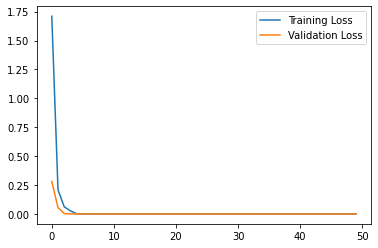

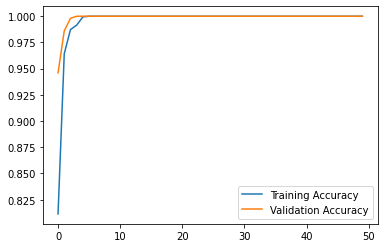

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('Loss_Value')


plt.plot(result.history['accuracy'], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy_Value')

THE FINAL MODEL

In [24]:
model.save('/content/drive/MyDrive/sign_data_mod_mod/Model_MobileNetV2.h5')